# Задание
* Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)
* Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
* Создайте DataFrame в котором будут даты публикации вакансий, названия, описания,  только добавьте поле ключевые навыки
* Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите вакансии с использованием python, которые вам интересны
* Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
* Постройте график наиболее востребованных навыков

In [57]:
import requests
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import os
from datetime import datetime
from operator import itemgetter
import time

In [63]:
sber = '3529'
page = 1
num_per_page = 100
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'

In [64]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
vac_num = [el.get('id') for el in vacancies.get('items')]

In [65]:
all_vac = []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}'
    res = requests.get(url)
    vacancies = res.json()
    vac_num = [el.get('id') for el in vacancies.get('items')]
    all_vac.extend(vac_num)

In [66]:
len(all_vac) #к сожалению так и не сообразила, как сделать полностью

2000

In [67]:
vacancy_all = [] #Полное описание
for ii in range(10): 
    x=100*ii
    ii+=1
    y=100*ii
    for i in range(x, y): 
        vac_id = all_vac[i]
        url = f'https://api.hh.ru/vacancies/{vac_id}'
        res = requests.get(url)
        vacancy = res.json()
        vacancy_all.append(vacancy)
    print(ii)
    time.sleep(150)

1
2
3
4
5
6
7
8
9
10


In [78]:
vacancies.get('items')[0]

{'id': '68148229',
 'premium': False,
 'name': 'Data Scientist (SberDevices)',
 'department': {'id': '3529-3529-it', 'name': 'Сбер. IT'},
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Кутузовский проспект',
  'building': '32',
  'lat': 55.740421,
  'lng': 37.532071,
  'description': None,
  'raw': 'Москва, Кутузовский проспект, 32',
  'metro': {'station_name': 'Кутузовская',
   'line_name': 'МЦК',
   'station_id': '95.536',
   'line_id': '95',
   'lat': 55.740833,
   'lng': 37.533333},
  'metro_stations': [{'station_name': 'Кутузовская',
    'line_name': 'МЦК',
    'station_id': '95.536',
    'line_id': '95',
    'lat': 55.740833,
    'lng': 37.533333}],
  'id': '823806'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-03-13T16:00:31+0300',
 'created_at': '2023-03-13T1

In [79]:
len(vacancies.get('items'))

100

In [80]:
vacancies.get('found')

6297

In [84]:
vac_information = pd.DataFrame(vacancy_all, columns = ['name','id','description','published_at','key_skills']) #создание датафрейма

In [88]:
#перевод в дататайм и построение графика
def convert_datetime(x): 
    if type(x)==str:
        new_d = datetime.strptime(x[:10], '%Y-%m-%d')
        return new_d
    else :
        new_d = None 
        return new_d

In [89]:
vac_information['published_at'] = pd.to_datetime(vac_information['published_at'].apply(convert_datetime)) 

In [91]:
print(vac_information)

                                                  name        id  \
0    Стажёр по направлению "Нагрузочное тестировани...  78413840   
1                                               Стажер  77873277   
2                                   Аналитик, Sber CIB  77664023   
3                               Финансовый консультант  75175324   
4                          Стажер (разработчик Python)  78717347   
..                                                 ...       ...   
995  Специалист дистанционного сбора просроченной з...  78006955   
996                        Менеджер легкой дистрибуции  78132005   
997               Бизнес - Аналитик (финансовые рынки)  78554953   
998         Ведущий инженер по сопровождению HR-систем  78646373   
999                   Старший менеджер по обслуживанию  77975866   

                                           description published_at  \
0    <p><strong>Оплачиваемая стажировка по направле...   2023-03-22   
1    <p>Мы приглашаем исследователей в об

In [92]:
vac_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          1000 non-null   object        
 1   id            1000 non-null   object        
 2   description   1000 non-null   object        
 3   published_at  1000 non-null   datetime64[ns]
 4   key_skills    1000 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 39.2+ KB


In [93]:
vac_date = vac_information.groupby(['published_at']).count() 

In [94]:
vac_date_plot = pd.DataFrame(vac_date, columns = ['id'])

<AxesSubplot:xlabel='published_at'>

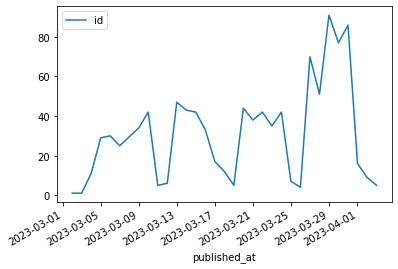

In [95]:
vac_date_plot.plot()

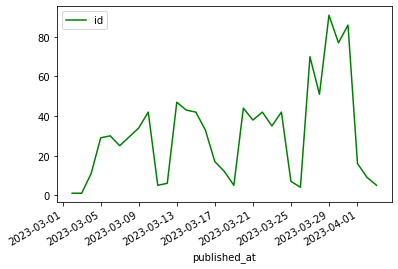

In [110]:
import matplotlib

vac_date_plot.plot(color='green')
  
plt.show() 

In [137]:
vac_week = pd.DataFrame(vacancy_all, columns = ['name','id','description','published_at','key_skills']) #перевод в дни недели

In [138]:
def convert_date_week(x):
    if type(x)==str:
        new_d = datetime.weekday(datetime.strptime(x[:10], '%Y-%m-%d'))
        return new_d
    else :
        new_d = 6 
        return new_d

In [139]:
vac_week['published_at'] = vac_week['published_at'].apply(convert_date_week).astype(int)

In [140]:
vac_week_count = vac_week.groupby(['published_at']).count()
vac_week_count 

,name,id,description,key_skills
published_at,,,,
0,196,196,196,196
1,157,157,157,157
2,175,175,175,175
3,180,180,180,180
4,188,188,188,188
5,51,51,51,51
6,53,53,53,53


In [144]:
vac_week_count.max() #больше всеего вакансий в пн

name           196
id             196
description    196
key_skills     196
dtype: int64

In [145]:
vac_fav = pd.DataFrame(vacancy_all, columns = ['name','id','description','published_at','key_skills'])

In [146]:
vac_withpython = []
for i in range(len(vac_fav)):
    if type(vac_fav['name'][i]) == str:
        if ('Python' in vac_fav['name'][i]) == True:
            vac_withpython.append(vac_fav['name'][i])

In [147]:
print(vac_withpython) #все вакансии с использованием python

['Стажер (разработчик Python)', 'Аналитик данных со знанием Python', 'Python developer', 'Разработчик Python', 'Python Developer', 'Python-разработчик', 'Python разработчик (Брокерский бизнес)', 'Специалист по оптимизации процессов со знанием Python', 'Специалист по оптимизации процессов со знанием Python', 'Python-разработчик', 'Python-разработчик', 'Программист Python (мониторинг инфраструктуры)', 'Python-разработчик в Цифровые поверхности Салют (Сценарная разработка)', 'Python-разработчик']


In [207]:
#самые распространенные навыки вакансий
vac_necskill = pd.DataFrame(vacancy_all, columns = ['name','id','description','published_at','key_skills'])

In [149]:
necskill = []
for i in range(len(vac_necskill)): 
    if len(vac_necskill['key_skills'][i]) != 0: 
        x=vac_necskill['key_skills'][i]
        for j in range(len(x)): 
            necskill.append(x[j]['name'])

In [150]:
print (necskill)

['Java', 'SQL', 'Нагрузочное тестирование', 'Английский язык', 'Подготовка презентаций', 'Навыки презентации', 'MS PowerPoint', 'MS Outlook', 'MS Excel', 'Деловое общение', 'Активные продажи', 'Нагрузочное тестирование', 'Деловое общение', 'Деловая переписка', 'Грамотность', 'Грамотная речь', 'Работа в команде', 'Деловая переписка', 'Деловое общение', 'Грамотная речь', 'Деловая коммуникация', 'Atlassian Jira', 'MS SQL', 'Jira', 'Функциональное тестирование', 'Тестирование', 'Телефонные переговоры', 'Грамотная речь', 'Доброта', 'Навыки делового общения', 'Работа с существующей базой клиентов', 'работа с физическими лицами', 'Активные продажи', 'Финансовый анализ', 'Работа в команде', 'Грамотная речь', 'B2C продажи', 'Деловая коммуникация', 'Организаторские навыки', 'Управление проектами', 'Ведение переговоров', 'Работа в команде', 'Анализ ФХД', 'Финансовый анализ', 'Кредиты для бизнеса', 'Анализ инвестиционных проектов', 'Оценка инвестиционных проектов', 'Проектное финансирование', 'Гра

In [173]:
res = max(sorted(necskill, reverse=True), key=lambda x: necskill.count(x)) 

In [174]:
print (res)  

SQL


In [182]:
#не уверена, что праивильно предыдущим методом, нашла еще один способ, но получился такой же ответ
def analysis(your_list, your_dict):
    for i in your_list:
        if i in your_dict:
            your_dict[i] += 1
        else:
            your_dict[i] = 1

In [185]:
dct_necskill = {}
analysis(necskill, dct_skill)

In [186]:
dct_necskill_sort = dict(sorted(dct_skill.items(), key=itemgetter(1), reverse=True))

In [187]:
index_for_max = []
for i in range(len(dct_necskill_sort.values())):
    if list(dct_necskill_sort.values())[i] == max(list(dct_necskill_sort.values())):
        index_for_max.append(i)

In [189]:
print()
for i in index_for_max:
    print(list(dct_necskill_sort.keys())[i])


SQL


In [203]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [205]:
import plotly as py
import plotly.graph_objs as go
pyplt=py.offline.plot
labels=list(dct_skill.keys())[0:10]
values=list(dct_skill.values())[0:10]
trace=[go.Pie(labels=labels,values=values)]
layout=go.Layout(
    title='Востребованные навыки'
)
fig=go.Figure(data=trace,layout=layout)
fig.show()